<a href="https://colab.research.google.com/github/SANIYAISGOD/composio/blob/master/Food_Adultration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import warnings
warnings.filterwarnings('ignore')




In [ ]:
data = pd.read_csv('/content/sample_data/food_adulteration_data.csv')

In [ ]:
categories = data['category'].unique()
for category in categories:
    category_data = data[data['category'] == category]
    print(f"Category: {category}")
    print(category_data.head())
    print()

Category: Meat
    adulteration_id product_name   brand category             adulterant  \
0                 1       Butter  BrandB     Meat  Artificial sweeteners   
2                 3       Yogurt  BrandC     Meat  Artificial sweeteners   
6                 7         Beef  BrandC     Meat               Melamine   
8                 9      Chicken  BrandC     Meat  Artificial sweeteners   
13               14         Beef  BrandA     Meat                  Chalk   

   detection_date          detection_method  severity health_risk  \
0       5/11/2024  Microbiological Analysis  Moderate         Low   
2       2/17/2024        Sensory Evaluation    Severe        High   
6        4/1/2024         Chemical Analysis     Minor      Medium   
8       6/14/2024  Microbiological Analysis     Minor         Low   
13      6/13/2024         Chemical Analysis  Moderate      Medium   

              action_taken  
0           Product Recall  
2   Investigation Launched  
6   Investigation Launched

In [ ]:
#Removing the adulteration id and filling the missing columns
df = data.drop('adulteration_id', axis=1)

df = data.fillna(df.mode().iloc[0])

label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   adulteration_id   1000 non-null   int64
 1   product_name      1000 non-null   int64
 2   brand             1000 non-null   int64
 3   category          1000 non-null   int64
 4   adulterant        1000 non-null   int64
 5   detection_date    1000 non-null   int64
 6   detection_method  1000 non-null   int64
 7   severity          1000 non-null   int64
 8   health_risk       1000 non-null   int64
 9   action_taken      1000 non-null   int64
dtypes: int64(10)
memory usage: 78.2 KB


In [ ]:
X = data.drop('health_risk', axis=1)
y = data['health_risk']

#Splitting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
#Printing the first 5 values
data.head()

,adulteration_id,product_name,brand,category,adulterant,detection_date,detection_method,severity,health_risk,action_taken
0,1,Butter,BrandB,Meat,Artificial sweeteners,5/11/2024,Microbiological Analysis,Moderate,Low,Product Recall
1,2,Chicken,BrandC,Dairy,Coloring agents,5/23/2024,Sensory Evaluation,Severe,Medium,Warning Issued
2,3,Yogurt,BrandC,Meat,Artificial sweeteners,2/17/2024,Sensory Evaluation,Severe,High,Investigation Launched
3,4,Wine,BrandB,Beverages,Coloring agents,5/16/2024,Spectroscopy,Minor,Medium,Product Recall
4,5,Bread,BrandD,Dairy,Water,6/6/2024,Chemical Analysis,Severe,Medium,Warning Issued


In [ ]:
#Printing the last 5 values
data.tail()

,adulteration_id,product_name,brand,category,adulterant,detection_date,detection_method,severity,health_risk,action_taken
995,996,Butter,BrandD,Beverages,Artificial sweeteners,6/13/2024,Chemical Analysis,Minor,Medium,Fine Imposed
996,997,Beef,BrandD,Beverages,Melamine,5/26/2024,Microbiological Analysis,Minor,Medium,Warning Issued
997,998,Bread,BrandD,Dairy,Chalk,3/25/2024,Microbiological Analysis,Moderate,High,Fine Imposed
998,999,Juice,BrandE,Beverages,Chalk,3/2/2024,Spectroscopy,Minor,High,Product Recall
999,1000,Chicken,BrandC,Meat,Artificial sweeteners,5/27/2024,Spectroscopy,Minor,Low,Warning Issued


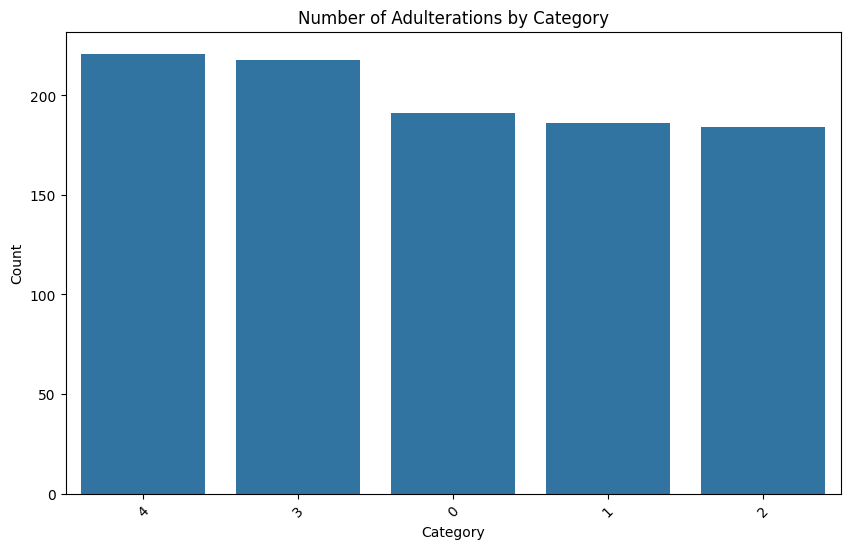

In [ ]:
#Bar plot on number of adulterants by category

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='category', order=df['category'].value_counts().index)
plt.title('Number of Adulterations by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


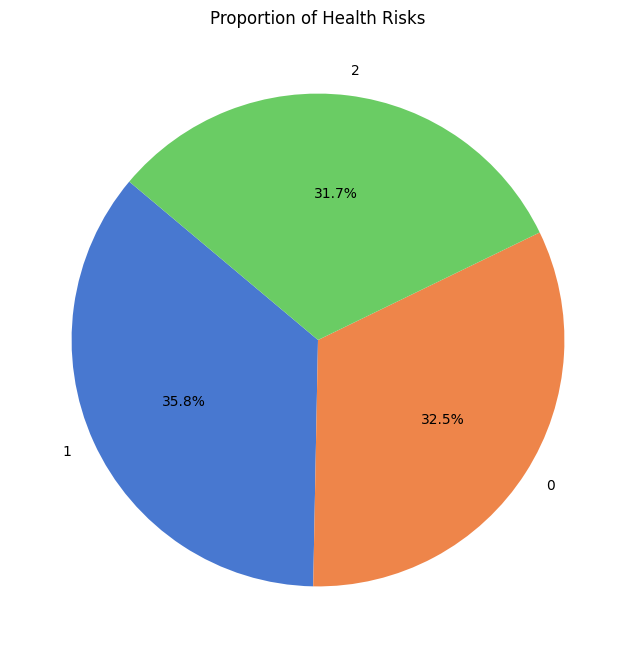

In [ ]:
# Pie chart on proprtion of health risks
plt.figure(figsize=(8, 8))
df['health_risk'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, colors=sns.color_palette('muted'))
plt.title('Proportion of Health Risks')
plt.ylabel('')
plt.show()


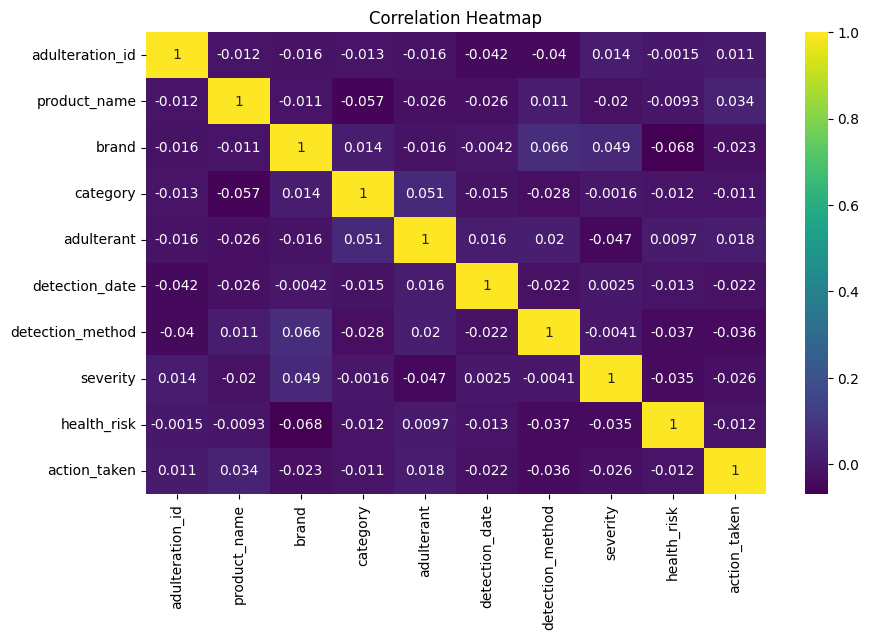

In [ ]:
#heatmap of correlation between numerical features
plt.figure(figsize=(10, 6))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title('Correlation Heatmap')
plt.show()


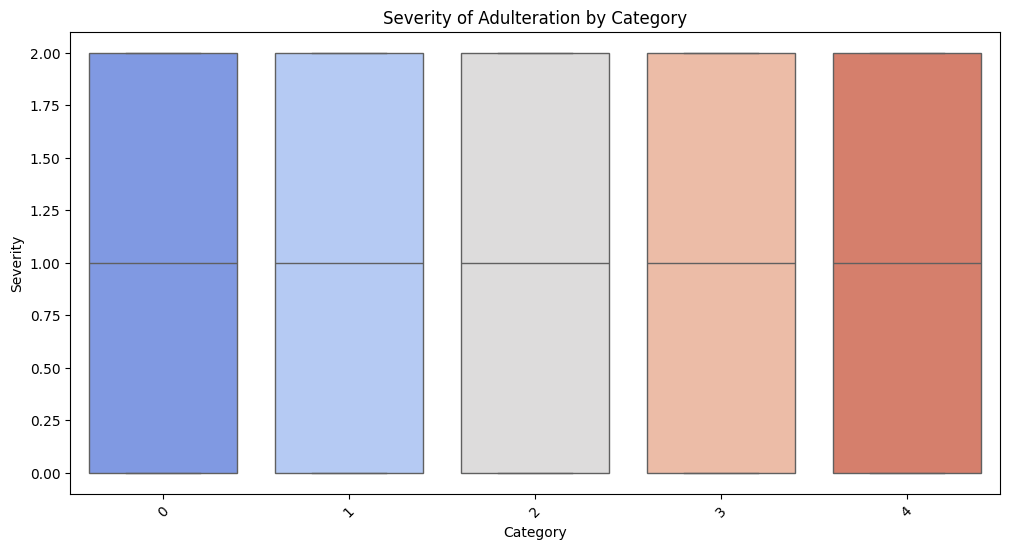

In [ ]:
# Boxplot for Severity of adulteration by category
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='category', y='severity', palette='coolwarm')
plt.title('Severity of Adulteration by Category')
plt.xlabel('Category')
plt.ylabel('Severity')
plt.xticks(rotation=45)
plt.show()


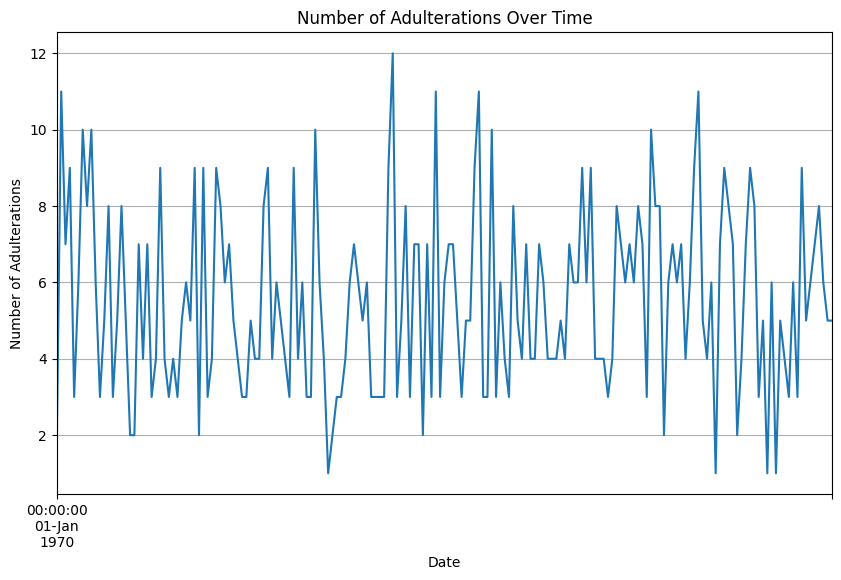

In [ ]:
#Number of adulterants over time
data['detection_date'] = pd.to_datetime(df['detection_date'])
adulterations_over_time = data['detection_date'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
adulterations_over_time.plot.line()
plt.title('Number of Adulterations Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Adulterations')
plt.grid(True)
plt.show()


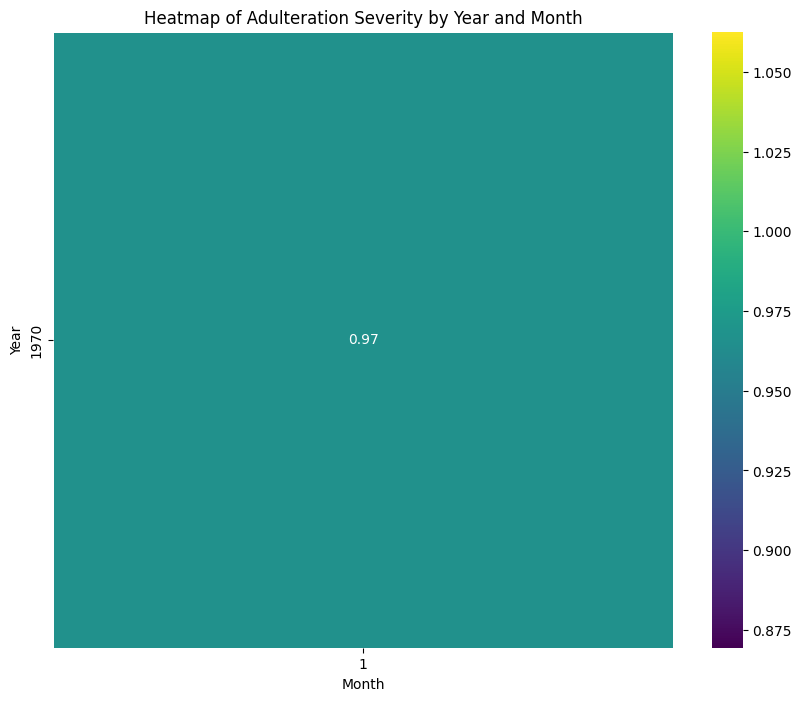

In [ ]:
# Create a pivot table with year-month as index and mean severity as values
df['detection_date'] = pd.to_datetime(df['detection_date']) # Convert 'detection_date' to datetime
heatmap_data = df.pivot_table(values='severity', index=df['detection_date'].dt.year,
                              columns=df['detection_date'].dt.month, aggfunc='mean') # Changed data to df

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap='viridis', linewidths=.5)
plt.title('Heatmap of Adulteration Severity by Year and Month')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

In [ ]:
#Training the model

# Import the necessary libraries
!pip install scikit-learn
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Iterate through each column in X_train
for col in X_train.columns:
    # Check if the column contains object (string) values
    if X_train[col].dtype == 'object':
        # Use LabelEncoder to fit and transform the column
        X_train[col] = label_encoder.fit_transform(X_train[col])

# Initialize the RandomForestClassifier model
model = RandomForestClassifier(random_state=42)

# Fit the model on the transformed data
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
#Evaluation of the model

# Iterate through each column in X_test
for col in X_test.columns:
    # Check if the column contains object (string) values
    if X_test[col].dtype == 'object':
        # Use LabelEncoder to fit and transform the column
        X_test[col] = label_encoder.fit_transform(X_test[col])

y_pred = model.predict(X_test)

# Print accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Print detailed classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.325
              precision    recall  f1-score   support

        High       0.30      0.25      0.28        67
         Low       0.37      0.41      0.39        76
      Medium       0.28      0.30      0.29        57

    accuracy                           0.33       200
   macro avg       0.32      0.32      0.32       200
weighted avg       0.32      0.33      0.32       200



In [ ]:
distinct_products = data[2].unique()

# Display distinct products
print(distinct_products)

KeyError: 2

In [ ]:
data.columns()

TypeError: 'Index' object is not callable